# 6. 行列分解（問題76～87）

In [2]:
import copy
import japanize_matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats

### 80

In [4]:
def svd_r(z, r):
    u, s, vh = np.linalg.svd(z)
    sigma = np.zeros((z.shape[0], z.shape[1]))
    for i in range(r):
        sigma[i, i] = s[i]
    tt = np.dot(np.dot(u, sigma), vh)
    return tt

(80,)


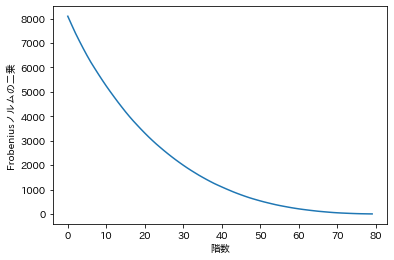

In [5]:
m = 100; n = 80; z = np.random.normal(size=m*n).reshape(m, -1)
F_norm = list()
for r in range(n):
    m = svd_r(z, r)
    F_norm.append(np.linalg.norm(z-m, ord="fro") ** 2)
print(np.array(F_norm).shape)
plt.plot(list(range(n)), F_norm)
plt.xlabel("階数")
plt.ylabel("Frobeniusノルムの二乗")
plt.show()

### 81

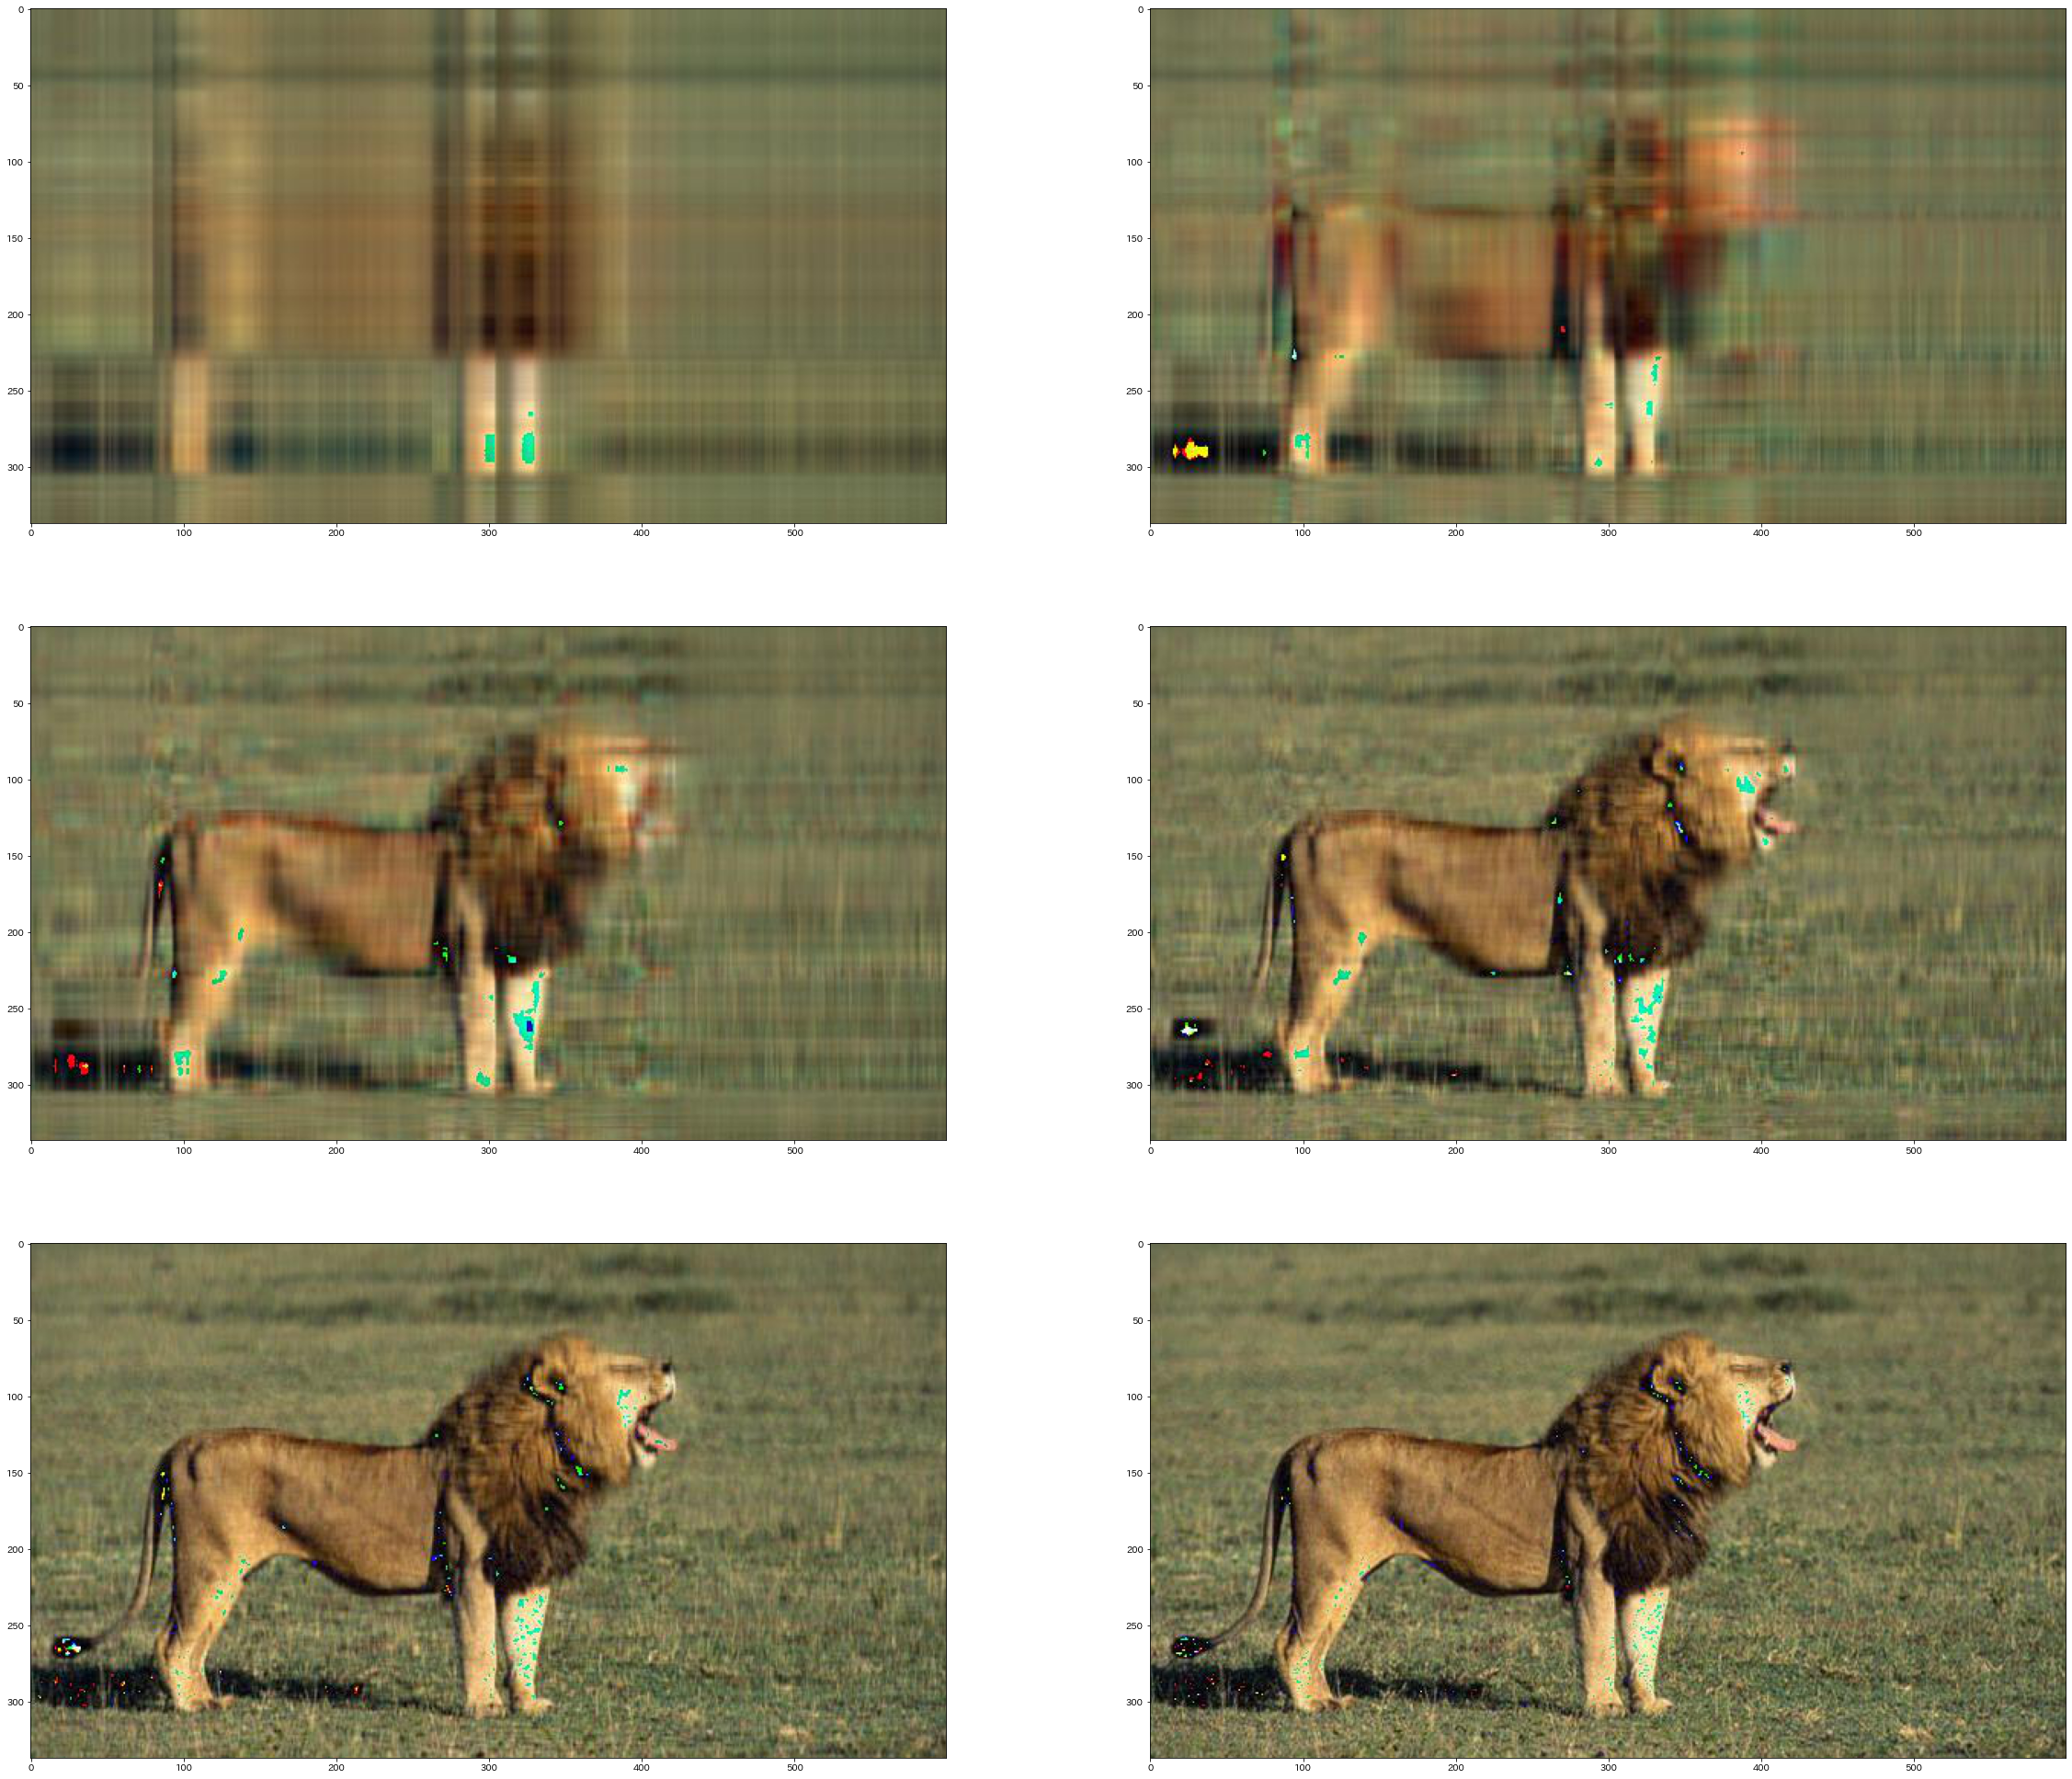

In [14]:
from PIL import Image
image = np.array(Image.open("lion.jpg"))
rank_seq = [2, 5, 10, 20, 50, 100]
mat = np.zeros((image.shape[0], image.shape[1], 3))
fig = plt.figure(figsize=(40, 35)); k = 1
for j in rank_seq:
    for i in range(3): mat[:, :, i] = svd_r(image[:, :, i], j)
    Image.fromarray(np.uint8(mat)).save(
        "compressed/lion_compressed_mat_rank_%d.jpg" % j)
    Im = Image.open("compressed/lion_compressed_mat_rank_%d.jpg" % j)
    fig.add_subplot(3, 2, k)
    imshow(Im)
    k = k + 1

### 82

In [ ]:
def mat_r(z, mask, r):
    min = np.inf
    m = z.shape[0]; n = z.shape[1]
    for j in range(5):
        guess = np.random.normal(size=m*n).reshape(m, -1)
        for i in range(10):
            guess = svd_r(mask * z + (1 - mask) * guess, r)
        value = np.linalg.norm(mask * (z - guess), ord="fro")
        if value < min: min_mat = guess; min = value
    return min_mat

In [ ]:
image = np.array(Image.open("lion.jpg"))
m = image.shape[0]; n = image.shape[1]
mask = np.random.binomial(1, 0.5, size=m*n).reshape(m, -1)
rank_seq = [2, 5, 10, 20, 50, 100]
fig = plt.figure(figsize=(40, 35)); k = 1
mat = np.zeros((image.shape[0], image.shape[1], 3))
for j in rank_seq:
    for i in range(3): mat[:, :, i] = mat_r(image[:, :, i], mask, j)
    Image.fromarray(np.uint8(mat)).save(
        "compressed/lion2_compressed_mat_rank_%d.jpg" % j)
    Im = Image.open("compressed/lion2_compressed_mat_rank_%d.jpg" % j)
    fig.add_subplot(3, 2, k)
    imshow(Im)
    k = k + 1

### 87

In [ ]:
def soft_svd(lambd, z):
    u, s, vh = np.linalg.svd(z)
    sigma = np.zeros((z.shape[0], z.shape[1]))
    for i in range(r):
        sigma[i, i] = s[i]
    return np.dot(np.dot(u, sigma), vh)

In [ ]:
def mat_lasso(lambd, z, mask):
    m = z.shape[0]; n = z.shape[1]
    guess = np.random.normal(size=m*n).reshape(m, -1)
    for i in range(20):
        guess = soft_svd(lambd, mask * z + (1 - mask) * guess)
    return guess

In [ ]:
image = np.array(Image.open("lion.jpg"))
m = image[:, :, 1].shape[0]; n = image[:, :, 1].shape[1]
p = 0.5; lambd = 0.5
mat = np.zeros((m, n, 3))
mask = np.random.binomial(1, p, size=m*n).reshape(-1, n)
for i in range(3):
    mat[:, :, i] = mat_lasso(lambd, image[:, :, i], mask)
Image.fromarray(np.uint8(mat)).save("compressed/lion3_compressed_mat_soft.jpg")
i = Image.open("compressed/lion3_compressed_mat_soft.jpg")
imshow(i)